# AML Assignment 4


# Q3

## (A)

In [151]:
import numpy as np
from sklearn.cluster import KMeans
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [152]:
#load data
fi = open('dataset1.txt')
data = np.loadtxt(fi)

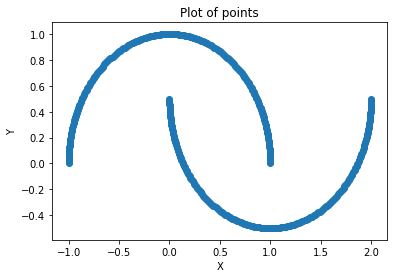

In [153]:
plt.scatter([i[0] for i in data], [i[1] for i in data])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of points')
plt.show()

It appears that there are 2 clusters.

In [154]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [155]:
#kmeans.labels_

In [156]:
def splitIdx(lbls, num): # returns list of list of indices for each label.
    ret = []
    for i in range(num):
        l = []
        j = 0
        while j<len(lbls):
            if lbls[j] == i:
                l.append(j)
            j+=1
        ret.append(l)
    
    return ret

In [157]:
lIdx = splitIdx(kmeans.labels_, 2)
#print()

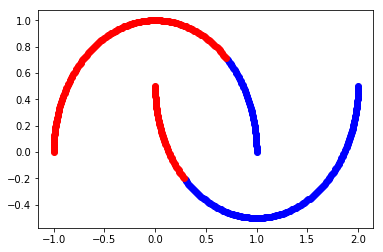

In [158]:
plt.close()
plt.plot(data[lIdx[0]][:,0], data[lIdx[0]][:,1], 'bo')
plt.plot(data[lIdx[1]][:,0], data[lIdx[1]][:,1], 'ro')

plt.show()

This is the clustering according to KMeans algorithm!

## (B) DBSCAN

In [159]:
__id = 0
__labels = [UNCLASSIFIED]
UNCLASSIFIED = -1
NOISE = -2

def nextId():
    global __id
    __id+=1
    return __id-1

In [160]:
#[1,2,3]+[2,3,4]

In [161]:
def regQuery(X, PointIdx, eps): # Returns list of indices of close neighbors
    ret = []
    for i in range(len(X)):
        if np.linalg.norm(np.subtract(X[PointIdx], X[i]),ord=2) < eps:
            ret.append(i)
    
    return ret

In [162]:
#Iterative, not recursive function
def expandCluster(X, PointIdx, ClId, eps, minpts):
    global __labels
    seeds = regQuery(X, PointIdx, eps)
    if len(seeds)<minpts:
        __labels[PointIdx] = NOISE
        return False
    # Else
    
    i = 0
    while i<len(seeds):
        nxtP = seeds[i]
        # If it was NOISE, then it has < minpts neighbors!
        if __labels[nxtP]==NOISE:
            __labels[nxtP] = ClId
        
        # expand CLuster fromt this point (ONLY IF UNCLASSFIED POINT)!
        elif __labels[nxtP]==UNCLASSIFIED:
            __labels[nxtP] = ClId
            
            newSeeds = regQuery(X, nxtP, eps)
            if(len(newSeeds)>minpts):
                # recursively expand cluster!
                seeds = seeds + newSeeds
        
        i += 1
    
    return True

In [163]:
def dbscanFit(X, eps, minpts):  # Returns labels and number of clusters!
    global __id
    global __labels
    __id = 0 
    __labels = [UNCLASSIFIED]*len(X)
    #print((__labels))
    clusterId = nextId()
    
    for i in range(len(X)):
        if(__labels[i]==UNCLASSIFIED):
            if expandCluster(X, i, clusterId, eps, minpts):
                clusterId = nextId()
    
    return __labels, __id-1

In [164]:
lb, li = dbscanFit(data, 0.2, 4)

Plotting the clusters according to DBSCAN:

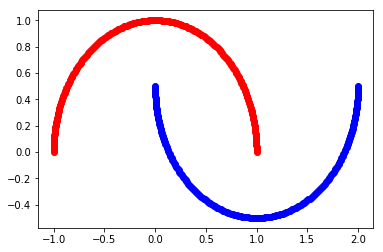

In [165]:

lIdx = splitIdx(lb, li)

plt.close()
plt.plot(data[lIdx[0]][:,0], data[lIdx[0]][:,1], 'bo')
plt.plot(data[lIdx[1]][:,0], data[lIdx[1]][:,1], 'ro')

plt.show()

## (C)

DBSCAN seems to more accurately find the clusters in this dataset compared to KMeans. 
This is because these clusters are such that they are reachable from their neighboring points from the same cluster and not from points from different clusters.  This helps the DBSCAN Algorithm.

KMeans does not work this way, and it classifies nearby points based on distances from a centroid.  

## (D)

In [167]:
#load data
fi = open('dataset2.txt')
data = np.loadtxt(fi)

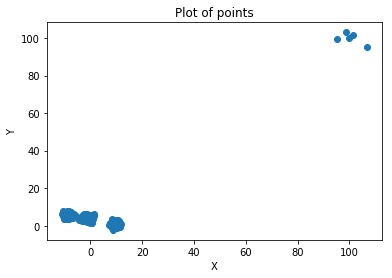

In [168]:
plt.scatter([i[0] for i in data], [i[1] for i in data])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of points')
plt.show()

### Using KMeans

In [169]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

In [170]:
lIdx = splitIdx(kmeans.labels_, 3)

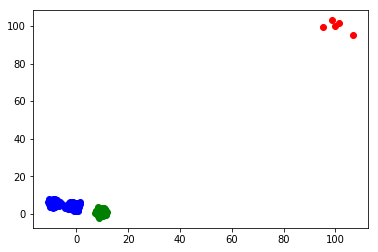

In [171]:
plt.close()
plt.plot(data[lIdx[0]][:,0], data[lIdx[0]][:,1], 'bo')
plt.plot(data[lIdx[1]][:,0], data[lIdx[1]][:,1], 'ro')
plt.plot(data[lIdx[2]][:,0], data[lIdx[2]][:,1], 'go')

plt.show()

### Using DBSCAN

In [176]:
lb, li = dbscanFit(data, 4, 3)

[-2  0  1  2]


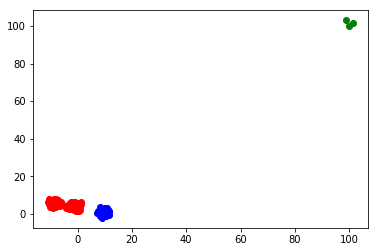

In [177]:
#print(li)
print(np.unique(__labels))


lIdx = splitIdx(lb, li)

plt.close()
plt.plot(data[lIdx[0]][:,0], data[lIdx[0]][:,1], 'bo')
plt.plot(data[lIdx[1]][:,0], data[lIdx[1]][:,1], 'ro')
plt.plot(data[lIdx[2]][:,0], data[lIdx[2]][:,1], 'go')


plt.show()

After tuning the parameters of DBScan, it came up with the above three clusters.

Kmeans also came up with similar clusters, but it used all the points

DBSCAN ignored some outlier points as noise

Conclusions:

* DBSCAN works better for some distribution of points which do not have clear, distinguishing center points as in the case of data set 1.
* DBSCAN can be tuned via the `eps` parameter to control how many clusters will be found. In K-Means, we have to directly specify the number of clusters which may not be easy to predict. 
* DBSCAN is more robust to noisy points.
* K Means works well we the clusters have distinct centers ( away from each other) 

# Q4

## (A) Reducing to two dimensions

In [181]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [182]:
iris = datasets.load_iris()

In [183]:
X_red = PCA(n_components=2).fit_transform(iris.data)

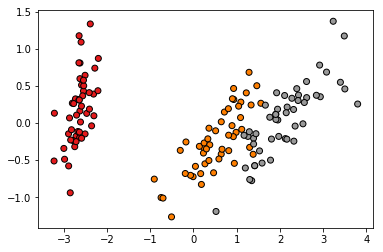

In [187]:
plt.clf()
plt.scatter(X_red[:,0], X_red[:,1],cmap=plt.cm.Set1, edgecolor='k',c=iris.target)
plt.show()